In [22]:
import numpy as np
from tinytag import TinyTag as tt
import os
import array
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
files = [f for f in os.listdir("/Users/m1cha1s/Music/MyMusic/") if f.endswith('.mp3')]

songs = []
tags = set()
for file in files:
    path = "/Users/m1cha1s/Music/MyMusic/"+file
    tag = tt.get(path)
    if tag.genre:
        songs.append((path, tag.genre))
        tags.add(tag.genre)

print(len(songs), songs)
print(len(tags), tags)

717 [('/Users/m1cha1s/Music/MyMusic/Toby Fox - Spooktune.mp3', 'Indie Game Soundtrack'), ('/Users/m1cha1s/Music/MyMusic/Pentatonix - Carol of the Bells.mp3', 'A Cappella'), ('/Users/m1cha1s/Music/MyMusic/VUKOVI - La Di Da.mp3', 'Pixie'), ('/Users/m1cha1s/Music/MyMusic/ACDC - Highway to Hell.mp3', 'Australian Rock'), ('/Users/m1cha1s/Music/MyMusic/Daryl Hall & John Oates - You Make My Dreams (Come True).mp3', 'Album Rock'), ('/Users/m1cha1s/Music/MyMusic/The Beatles - And I Love Her - Remastered.mp3', 'British Invasion'), ('/Users/m1cha1s/Music/MyMusic/Kimbra - Top of the World.mp3', 'Bergen Indie'), ("/Users/m1cha1s/Music/MyMusic/RAT BOY, IBDY - Who's Ready for Tomorrow.mp3", 'English Indie Rock'), ('/Users/m1cha1s/Music/MyMusic/Concorde, Clément Froissart - Just Kiss Her.mp3', 'Rock Independant Francais'), ('/Users/m1cha1s/Music/MyMusic/Shinsei Kamattechan - Boku no Sensou.mp3', 'Japanese Alternative Rock'), ('/Users/m1cha1s/Music/MyMusic/Sabaton - The Last Stand.mp3', 'Power Metal')

In [ ]:
print(songs[0][0])
y, sr = sf.read(songs[1][0])

print(sr, len(y), y[:, 0])

/Users/m1cha1s/Music/MyMusic/Toby Fox - Spooktune.mp3
48000 9306273 [0. 0. 0. ... 0. 0. 0.]


In [32]:
song_spectogram = []

L = 10000
for i in range(0, len(y), L):
    # end = i+L if i+L < len(y) else len(y)
    Y = np.fft.fft(y[i:i+L, 0])
    N = len(Y)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    # print(Y)

    # plt.specgram(y[:,0])
    # plt.plot()
    song_spectogram.append(np.abs(Y)[N//2:N])
    # plt.plot(freq[N//2:N]-(np.max(freq)//2), np.abs(Y)[N//2:N])
    # plt.show()

print(len(song_spectogram[0]))

5000


(930, 5000)


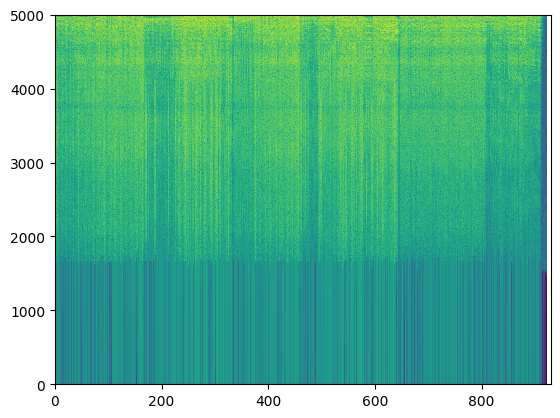

In [33]:
song_spectogram = np.array(song_spectogram[:-1])

print(song_spectogram.shape)

plt.pcolormesh(song_spectogram.T, cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.show()